In [50]:
# Importing packages
import mne
import matplotlib.pyplot as plt

In [51]:
# Load data: Get the fif file in the folder by listing files in path
#fif_file_path = list((MEG_data_path / subject / subject_folder / "MEG" / recording_name / "files").glob("*.fif"))[0]

In [52]:
import mne
from pathlib import Path
import matplotlib.pyplot as plt

def preprocess_data_sensorspace(fif_path: Path, reject=None):
    print(f"reject criteria are: {reject}")
    
    raw = mne.io.read_raw_fif(fif_path, preload=True)

    # projecting out the empty room noise
    raw.apply_proj()

    # Low pass filtering to get rid of line noise
    raw.filter(None, 40)

    # downsampling to 250 Hz (from 1000 Hz)
    raw.resample(250)

    # find the events
    events = mne.find_events(raw, min_duration=2/raw.info["sfreq"])

    # remove channel MEG0422 (bad in pretty much all recordings)
    raw.drop_channels(["MEG0422"])

    # epoching
    epochs = mne.Epochs(
        raw, events, tmin=-0.2, tmax=1, baseline=(None, 0),
        preload=True, reject=reject
    )

    return epochs


def calculate_and_plot_erf(epochs, event_id=None, title=None):
    """
    [Your existing docstring]
    
    Parameters
    ----------
    epochs : mne.Epochs
        The epoched data.
    event_id : int or str, optional
        The id of the event for which to compute the ERF.
        If None (default), all epochs will be used.
    title : str, optional
        The title to be added on top of the plots. 
        If None (default), no title will be added.
    """
    # [Other existing code...]
    
    

def calculate_and_plot_erf(epochs, event_id=None, title =None):
    """
    Calculate and plot the Event-Related Field (ERF) for specified epochs 
    along with separate Global Field Powers (GFP) for magnetometers and 
    gradiometers.

    Parameters
    ----------
    epochs : mne.Epochs
        The epoched data.
    event_id : int or str, optional
        The id of the event for which to compute the ERF. 
        If None (default), all epochs will be used.
    """
    if event_id is not None:
        # Compute ERF for specific event type
        erf = epochs[event_id].average()
    else:
        # Compute ERF using all epochs
        erf = epochs.average()

    # Separate data for magnetometers and gradiometers
    erf_mag = erf.copy().pick_types(meg='mag')
    erf_grad = erf.copy().pick_types(meg='grad')

    # Calculate GFP for magnetometers and gradiometers
    gfp_mag = erf_mag.data.std(axis=0, ddof=0)
    gfp_grad = erf_grad.data.std(axis=0, ddof=0)
   
    # Create subplots: 2 for GFPs, 2 for the ERFs of mag and grad
    fig, axs = plt.subplots(4, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [1, 2, 1, 2]})

     # Add a title if provided
    if title is not None:
        fig.suptitle(title, fontsize=16, y=1.02)

    # Plot GFP for magnetometers
    axs[0].plot(erf.times, gfp_mag, label='GFP (mag)', color='b')
    axs[0].set_title('Global Field Power (GFP) - Magnetometers')
    axs[0].legend()
    
    # Plot ERF for magnetometers
    erf_mag.plot(axes=axs[1], show=False, spatial_colors=True, titles='ERF - Magnetometers')
    
    # Plot GFP for gradiometers
    axs[2].plot(erf.times, gfp_grad, label='GFP (grad)', color='r')
    axs[2].set_title('Global Field Power (GFP) - Gradiometers')
    axs[2].legend()

    # Plot ERF for gradiometers
    erf_grad.plot(axes=axs[3], show=True, spatial_colors=True, titles='ERF - Gradiometers')

    return erf

def get_event_name(event_dict, event_id_to_find):
    """
    Get event name corresponding to a provided event id.

    Parameters
    ----------
    event_dict : dict
        Dictionary mapping event names to event ids.
    event_id_to_find : int
        The event id for which to find the corresponding name.

    Returns
    -------
    str
        The name of the event corresponding to event_id_to_find.
        Returns None if the event_id is not found.
    """
    for name, id in event_dict.items():
        if id == event_id_to_find:
            return name
    return None  # or some default value if preferred

'''FUNC for GFP for both grad and mag in same plot'''
# def calculate_and_plot_erf(epochs, event_id=None):
#     """
#     Calculate and plot the Event-Related Field (ERF) for specified epochs 
#     along with the Global Field Power.

#     Parameters
#     ----------
#     epochs : mne.Epochs
#         The epoched data.
#     event_id : int or str, optional
#         The id of the event for which to compute the ERF. 
#         If None (default), all epochs will be used.
#     """
#     if event_id is not None:
#         # Compute ERF for specific event type
#         erf = epochs[event_id].average()
#     else:
#         # Compute ERF using all epochs
#         erf = epochs.average()

#     # Plotting ERF and GFP
#     fig, axs = plt.subplots(3, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 2, 2]})

#     # Compute and plot the GFP on the first axis
#     gfp = erf.data.std(axis=0, ddof=0)  # Standard deviation across channels at each time point
#     axs[0].plot(erf.times, gfp, label='GFP')
#     axs[0].set_title('Global Field Power (GFP)')
#     axs[0].legend()

#     # Plot the ERF for magnetometers and gradiometers on the remaining axes
#     erf.plot(axes=axs[1:], show=True, spatial_colors=True)

#     return erf

'''FUNC for only erf's'''
# def calculate_and_plot_erf(epochs, event_id=None):
#     """
#     Calculate and plot the Event-Related Field (ERF) for specified epochs.

#     Parameters
#     ----------
#     epochs : mne.Epochs
#         The epoched data.
#     event_id : int or str, optional
#         The id of the event for which to compute the ERF. 
#         If None (default), all epochs will be used.
#     """
#     if event_id is not None:
#         # Compute ERF for specific event type
#         erf = epochs[event_id].average()
#     else:
#         # Compute ERF using all epochs
#         erf = epochs.average()

#     # Plotting ERF
#     fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # Create 2 subplots
#     erf.plot(axes=axs, show=True, spatial_colors=True)

#     return erf

# Example usage:
# fif_path = Path("path_to_your_file.fif")
# epochs = preprocess_data_sensorspace(fif_path, reject={"mag": 4e-12, "grad": 4e-10})
# erf = calculate_and_plot_erf(epochs, event_id='your_event_id')


"FUNC for only erf's"

In [53]:
# -- Info dicts
subject_dict = { # subject id: subject folder
    '0108': '20230928_000000',
    '0109': '20230926_000000',
    '0110': '20230926_000000',
    '0111': '20230926_000000',
    '0112': '20230927_000000',
    '0113': '20230927_000000',
    '0114': '20230927_000000',
    '0115': '20230928_000000'
}

event_dict = { # trigger codes
    'IMG_PS': 11,
    'IMG_PO': 21,
    'IMG_NS': 12,
    'IMG_NO': 22,
    'IMG_BM': 13,
    'IMG_BI': 23
}


In [54]:
# Setting participant (and optional trigger) I want to run this for
subject_numb = '0109'  # e.g., selecting subject 0109
subject_folder_numb = subject_dict[subject_numb]  # this will return '20230926_000000'
event_id = event_dict['IMG_PS']  # event_id will be 11



 
 ###### 
 CURRENT CONDITION BEING PLOTTED IS 
 
 : 001.self_block1 
 
 ###### 
 

reject criteria are: None
Opening raw data file /work/834761/0109/20230926_000000/MEG/001.self_block1/files/self_block1.fif...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle


    Range : 452000 ... 875999 =    452.000 ...   875.999 secs
Ready.
Reading 0 ... 423999  =      0.000 ...   423.999 secs...


/tmp/ipykernel_4714/3612110488.py:8: RuntimeWarning: This filename (/work/834761/0109/20230926_000000/MEG/001.self_block1/files/self_block1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_path, preload=True)


Created an SSP operator (subspace dimension = 9)
9 projection items activated
SSP projectors applied...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.3s


161 events found
Event IDs: [ 11  12  23 128 202]
161 events found
Event IDs: [ 11  12  23 128 202]
160 events found
Event IDs: [ 11  12  23 202]
Not setting metadata
160 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 9)
9 projection items activated
Using data from preloaded Raw for 160 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-01, active : True, n_channels : 203, exp. var : 58.95%>
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-02, active : True, n_channels : 203, exp. var : 21.13%>
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-03, active : True, n_channels : 203, exp. var : 11.68%>
NOTE: pick_types() is a legacy fun

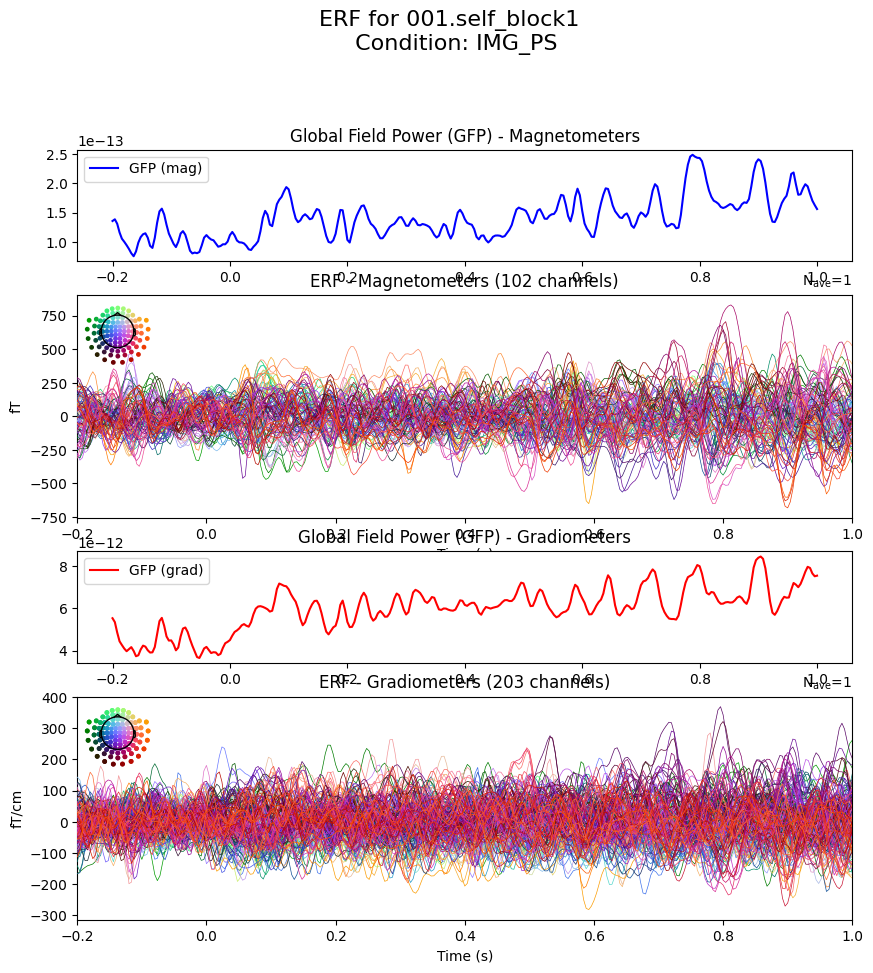


 
 ###### 
 CURRENT CONDITION BEING PLOTTED IS 
 
 : 002.other_block1 
 
 ###### 
 

reject criteria are: None
Opening raw data file /work/834761/0109/20230926_000000/MEG/002.other_block1/files/other_block1.fif...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
    Range : 43000 ... 427999 =     43.000 ...   427.999 secs
Ready.
Reading 0 ... 384999  =      0.000 ...   384.999 secs...


/tmp/ipykernel_4714/3612110488.py:8: RuntimeWarning: This filename (/work/834761/0109/20230926_000000/MEG/002.other_block1/files/other_block1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_path, preload=True)


Created an SSP operator (subspace dimension = 9)
9 projection items activated
SSP projectors applied...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.0s


160 events found
Event IDs: [ 21  22  23 103 202]
160 events found
Event IDs: [ 21  22  23 103 202]
160 events found
Event IDs: [ 21  22  23 103 202]
Not setting metadata
160 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 9)
9 projection items activated
Using data from preloaded Raw for 160 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-01, active : True, n_channels : 203, exp. var : 58.95%>
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-02, active : True, n_channels : 203, exp. var : 21.13%>
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-03, active : True, n_channels : 203, exp. var : 11.68%>
NOTE: pick_types() is a legacy

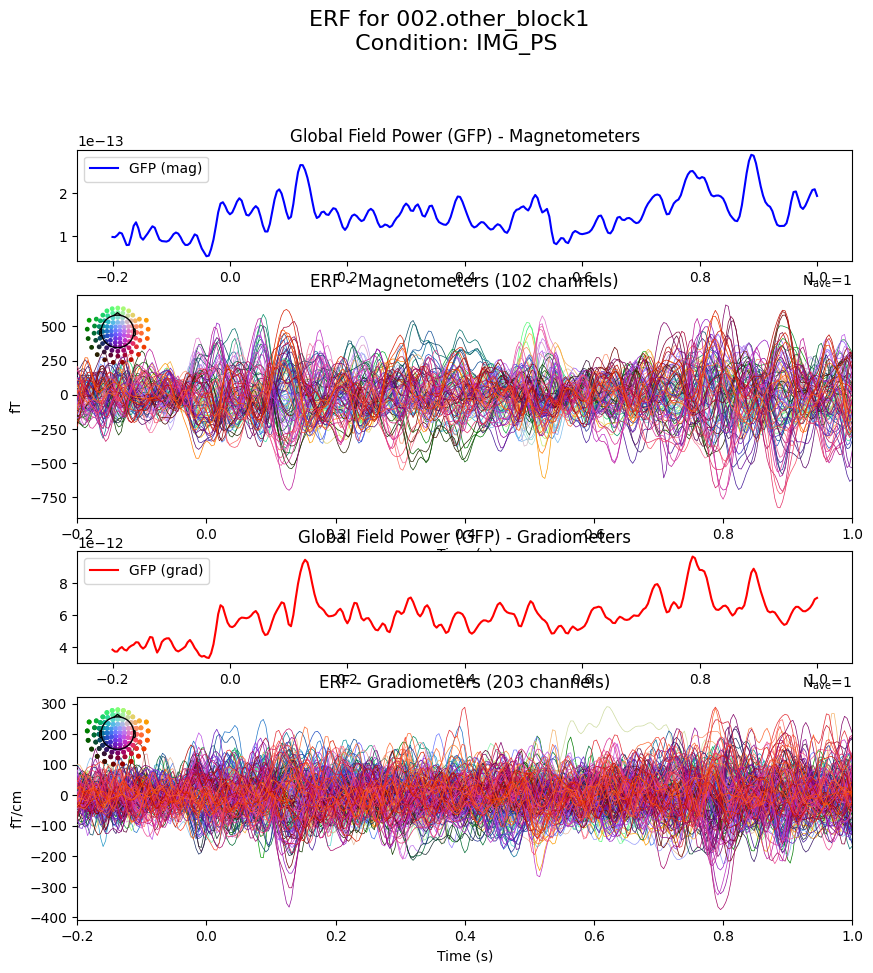


 
 ###### 
 CURRENT CONDITION BEING PLOTTED IS 
 
 : 003.self_block2 
 
 ###### 
 

reject criteria are: None
Opening raw data file /work/834761/0109/20230926_000000/MEG/003.self_block2/files/self_block2.fif...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
    Range : 41000 ... 422999 =     41.000 ...   422.999 secs
Ready.
Reading 0 ... 381999  =      0.000 ...   381.999 secs...


/tmp/ipykernel_4714/3612110488.py:8: RuntimeWarning: This filename (/work/834761/0109/20230926_000000/MEG/003.self_block2/files/self_block2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_path, preload=True)


Created an SSP operator (subspace dimension = 9)
9 projection items activated
SSP projectors applied...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    3.9s


162 events found
Event IDs: [ 11  12  23 103 202]
162 events found
Event IDs: [ 11  12  23 103 202]
162 events found
Event IDs: [ 11  12  23 103 202]
Not setting metadata
162 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 9)
9 projection items activated
Using data from preloaded Raw for 162 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-01, active : True, n_channels : 203, exp. var : 58.95%>
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-02, active : True, n_channels : 203, exp. var : 21.13%>
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-03, active : True, n_channels : 203, exp. var : 11.68%>
NOTE: pick_types() is a legacy

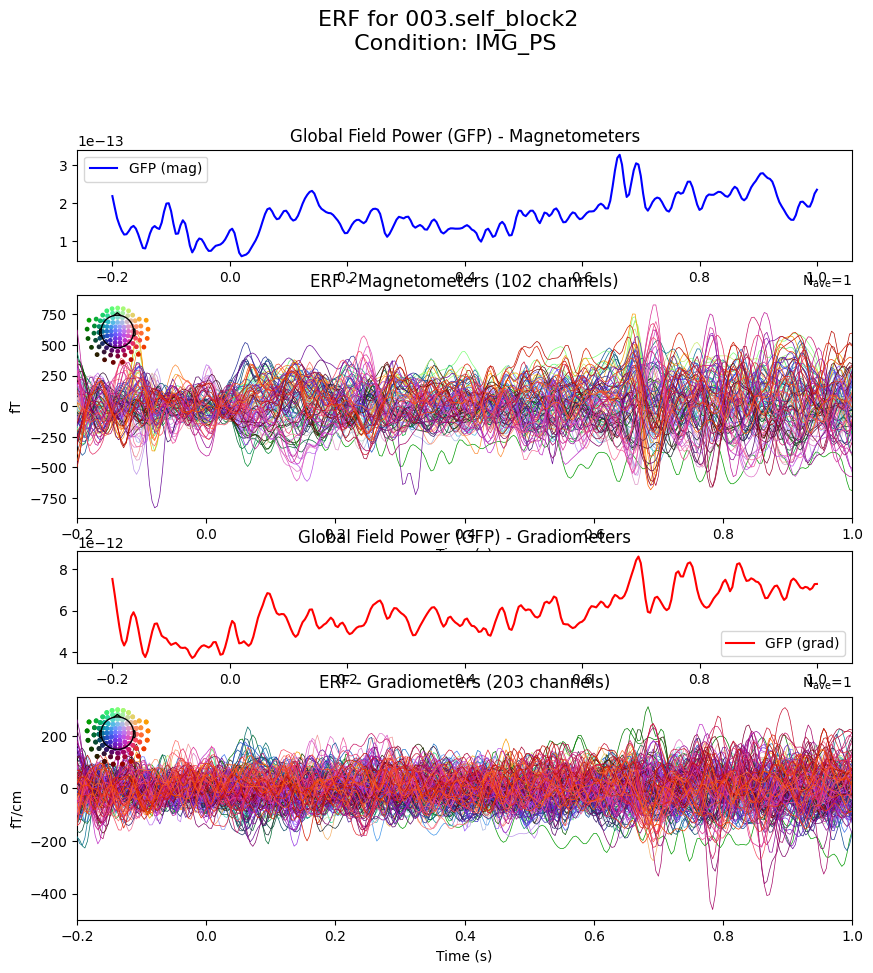


 
 ###### 
 CURRENT CONDITION BEING PLOTTED IS 
 
 : 004.other_block2 
 
 ###### 
 

reject criteria are: None
Opening raw data file /work/834761/0109/20230926_000000/MEG/004.other_block2/files/other_block2.fif...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
    Range : 28000 ... 412999 =     28.000 ...   412.999 secs
Ready.
Reading 0 ... 384999  =      0.000 ...   384.999 secs...


/tmp/ipykernel_4714/3612110488.py:8: RuntimeWarning: This filename (/work/834761/0109/20230926_000000/MEG/004.other_block2/files/other_block2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_path, preload=True)


Created an SSP operator (subspace dimension = 9)
9 projection items activated
SSP projectors applied...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    3.8s


163 events found
Event IDs: [ 21  22  23 103 202]
163 events found
Event IDs: [ 21  22  23 103 202]
163 events found
Event IDs: [ 21  22  23 103 202]
Not setting metadata
163 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 9)
9 projection items activated
Using data from preloaded Raw for 163 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-01, active : True, n_channels : 203, exp. var : 58.95%>
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-02, active : True, n_channels : 203, exp. var : 21.13%>
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-03, active : True, n_channels : 203, exp. var : 11.68%>
NOTE: pick_types() is a legacy

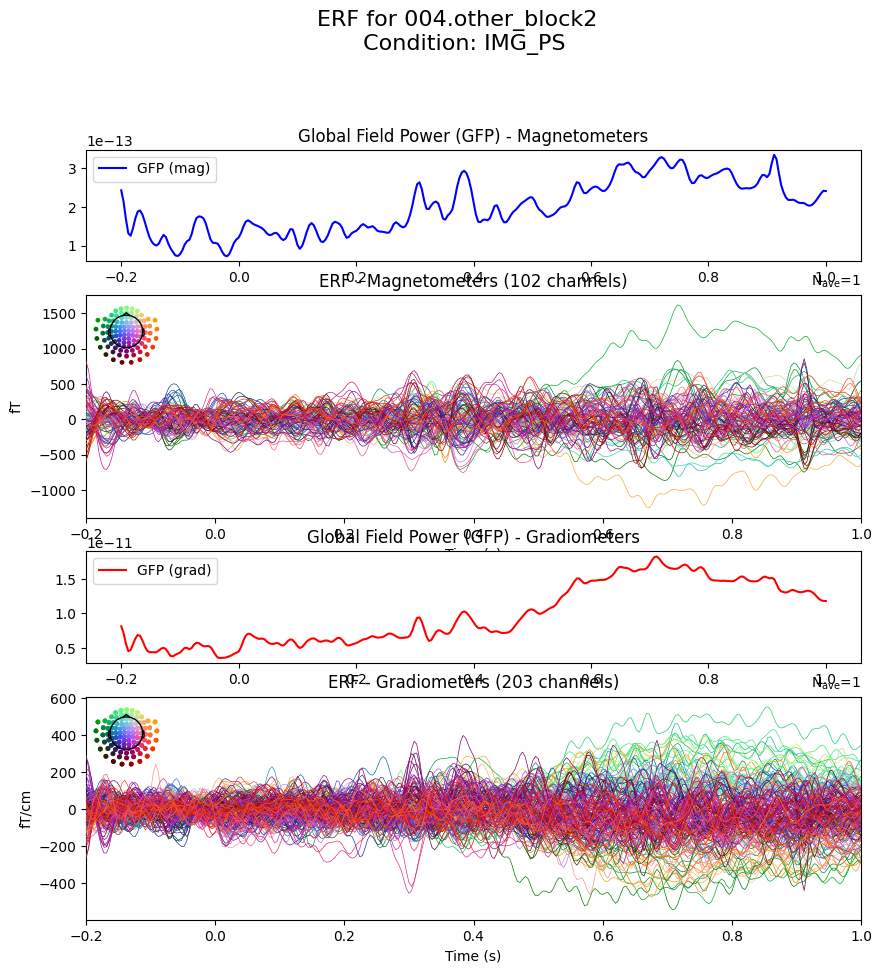


 
 ###### 
 CURRENT CONDITION BEING PLOTTED IS 
 
 : 005.self_block3 
 
 ###### 
 

reject criteria are: None
Opening raw data file /work/834761/0109/20230926_000000/MEG/005.self_block3/files/self_block3.fif...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
    Range : 24000 ... 400999 =     24.000 ...   400.999 secs
Ready.
Reading 0 ... 376999  =      0.000 ...   376.999 secs...


/tmp/ipykernel_4714/3612110488.py:8: RuntimeWarning: This filename (/work/834761/0109/20230926_000000/MEG/005.self_block3/files/self_block3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_path, preload=True)


Created an SSP operator (subspace dimension = 9)
9 projection items activated
SSP projectors applied...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.9s


162 events found
Event IDs: [ 11  12  23 103 200 202]
162 events found
Event IDs: [ 11  12  23 103 200 202]
161 events found
Event IDs: [ 11  12  23 103 202]
Not setting metadata
161 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 9)
9 projection items activated
Using data from preloaded Raw for 161 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-01, active : True, n_channels : 203, exp. var : 58.95%>
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-02, active : True, n_channels : 203, exp. var : 21.13%>
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-03, active : True, n_channels : 203, exp. var : 11.68%>
NOTE: pick_types() is 

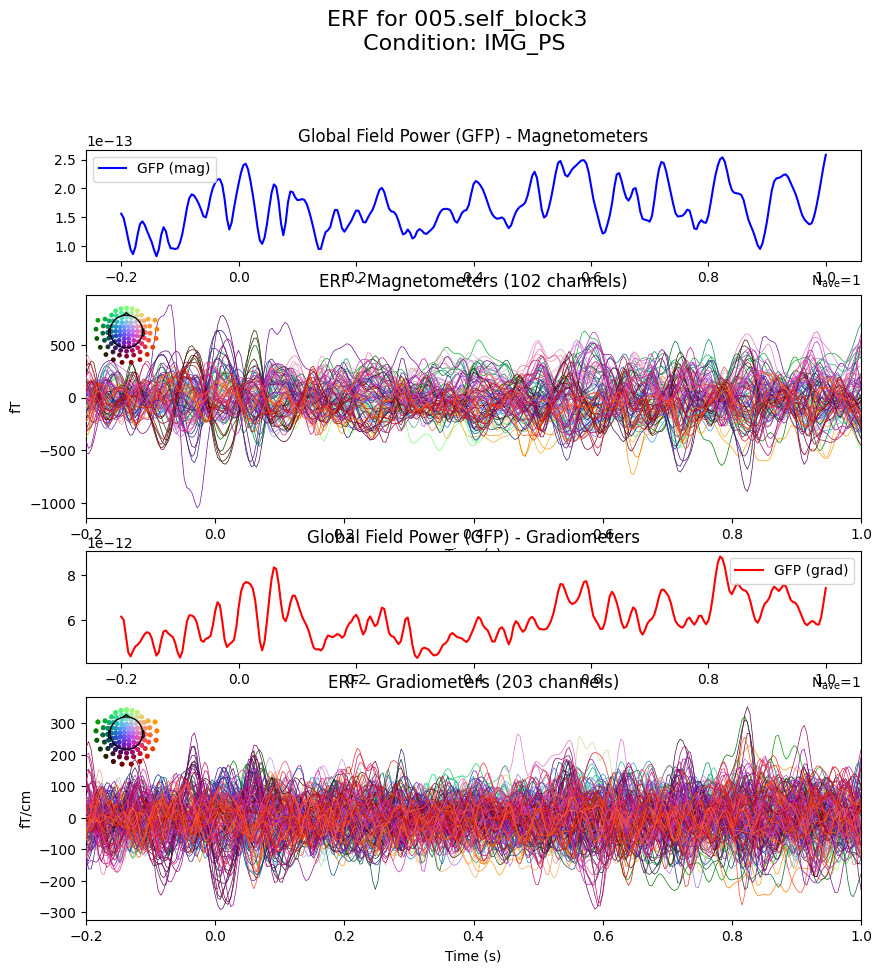


 
 ###### 
 CURRENT CONDITION BEING PLOTTED IS 
 
 : 006.other_block3 
 
 ###### 
 

reject criteria are: None
Opening raw data file /work/834761/0109/20230926_000000/MEG/006.other_block3/files/other_block3.fif...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
    Range : 19000 ... 396999 =     19.000 ...   396.999 secs
Ready.
Reading 0 ... 377999  =      0.000 ...   377.999 secs...


/tmp/ipykernel_4714/3612110488.py:8: RuntimeWarning: This filename (/work/834761/0109/20230926_000000/MEG/006.other_block3/files/other_block3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_path, preload=True)


Created an SSP operator (subspace dimension = 9)
9 projection items activated
SSP projectors applied...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    4.3s


162 events found
Event IDs: [ 21  22  23 103 202]
162 events found
Event IDs: [ 21  22  23 103 202]
162 events found
Event IDs: [ 21  22  23 103 202]
Not setting metadata
162 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 9)
9 projection items activated
Using data from preloaded Raw for 162 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-01, active : True, n_channels : 203, exp. var : 58.95%>
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-02, active : True, n_channels : 203, exp. var : 21.13%>
Removing projector <Projection | planar-Raw-0.000-120.000-PCA-03, active : True, n_channels : 203, exp. var : 11.68%>
NOTE: pick_types() is a legacy

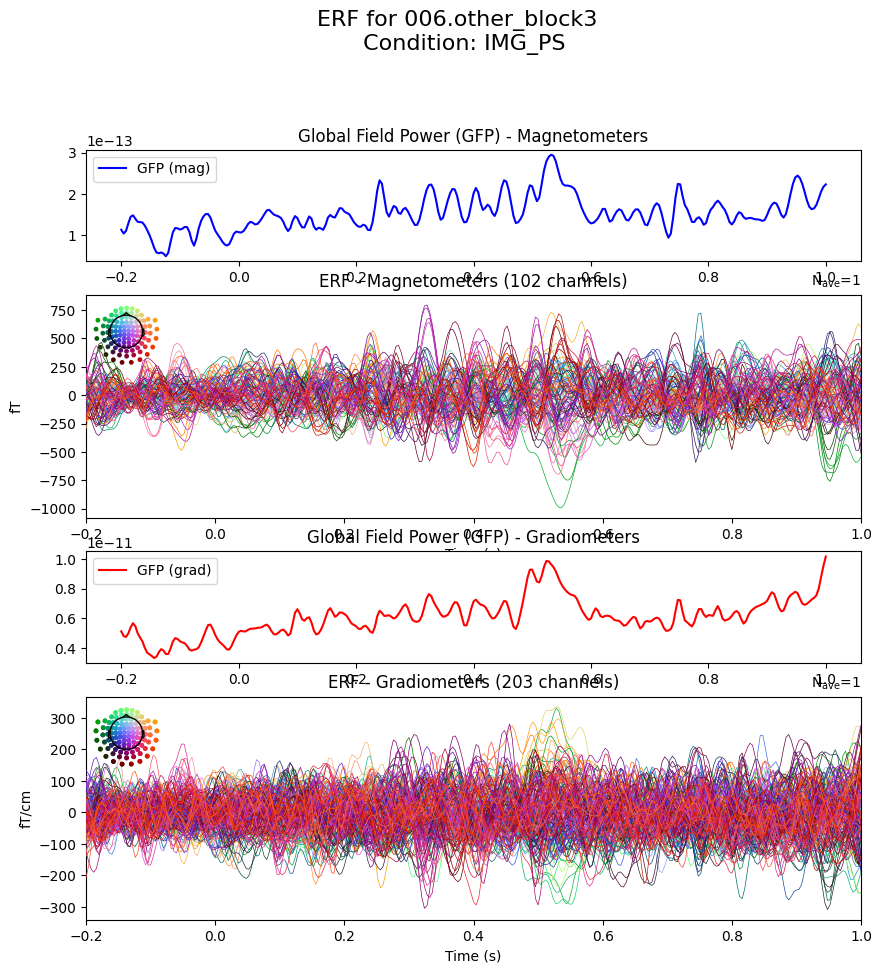

In [55]:
# Trying for one participant
list_of_trials = ['001.self_block1',  
                  '002.other_block1', 
                  '003.self_block2',  
                  '004.other_block2', 
                  '005.self_block3',  
                  '006.other_block3']

# Set paths and subjects
MEG_data_path = Path("/work/834761") 
subject = subject_numb 
subject_folder = subject_folder_numb 

# Looping through trials to get erf
for recording_name in list_of_trials: # recording name is e.g. "001.self_block1"

        print(f"\n \n ###### \n CURRENT CONDITION BEING PLOTTED IS \n \n : {recording_name} \n \n ###### \n \n")

        # Get the fif file in the folder by listing files in path
        fif_file_path = list((MEG_data_path / subject / subject_folder / "MEG" / recording_name / "files").glob("*.fif"))[0]
        
        # Preproc, no reject
        epochs = preprocess_data_sensorspace(fif_file_path)

        # ERF
        calculate_and_plot_erf(epochs, event_id=event_id, title=f"ERF for {recording_name} \n Condition: {get_event_name(event_dict,event_id)}") 
                